## What is the hesitancy of vaccines by state and government party?

We will explore this data on the state level and construct a box plot to show proportion of residents who fall into three categories:

- **Hesitant**
- **Hesitant or Unsure**
- **Strongly Hesitant**

### Data used
* CDC Vaccine Hesitancy
* State Political Parties

In [16]:
# Load libraries and data
import pandas as pd
import numpy as np

state_hesitancy_df = pd.read_csv('../data/cdc-vaccine-hesitancy.csv')
state_parties_df = pd.read_csv('../data/state-political-parties.csv')

In [17]:
# Group hesitancy data by state
state_hesitancy_df = state_hesitancy_df.filter(
    [
        'State', 
        'Estimated hesitant', 
        'Estimated hesitant or unsure', 
        'Estimated strongly hesitant'
    ]
)

state_hesitancy_df = state_hesitancy_df.groupby('State').mean()
state_hesitancy_df.head()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant
State,,,
ALABAMA,0.173507,0.231512,0.132409
ALASKA,0.217386,0.264245,0.156907
ARIZONA,0.159240,0.242547,0.121353
ARKANSAS,0.212123,0.261232,0.139901
CALIFORNIA,0.072274,0.111041,0.035807


In [18]:
# Attatch state Governer's party
state_parties_df['State'] = state_parties_df['Location'].apply(
    lambda x: x.upper() # Uppercase all state names
)
state_parties_df.drop(columns=['Location'], inplace=True) 
state_parties_df.set_index('State', inplace=True)

state_hesitancy_df = state_hesitancy_df.merge(state_parties_df, left_index=True, right_index=True)

state_hesitancy_df.head()

,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Governor Political Affiliation
State,,,,
ALABAMA,0.173507,0.231512,0.132409,Republican
ALASKA,0.217386,0.264245,0.156907,Republican
ARIZONA,0.159240,0.242547,0.121353,Republican
ARKANSAS,0.212123,0.261232,0.139901,Republican
CALIFORNIA,0.072274,0.111041,0.035807,Democrat


array([[<AxesSubplot:title={'center':'Estimated hesitant'}, xlabel='Governor Political Affiliation'>,
        <AxesSubplot:title={'center':'Estimated hesitant or unsure'}, xlabel='Governor Political Affiliation'>],
       [<AxesSubplot:title={'center':'Estimated strongly hesitant'}, xlabel='Governor Political Affiliation'>,
        <AxesSubplot:>]], dtype=object)

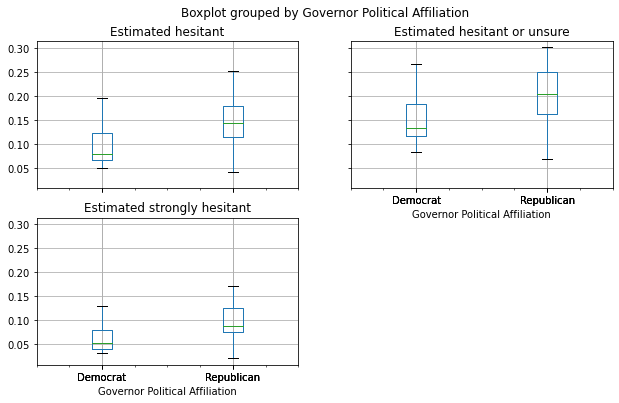

In [19]:
# Boxplot of hesitancy estimates by political party 
state_hesitancy_df.boxplot(
    column=[
        'Estimated hesitant', 
        'Estimated hesitant or unsure', 
        'Estimated strongly hesitant'
    ], 
    by='Governor Political Affiliation',
    figsize=(10, 6)
)

## Conclusion:

These boxplots show that Republicans are much more likely to be hesitant towards the COVID-19 vaccine than Democrats.
In other notebooks we look into death proportions by state and political party to see if there is a difference in proportion of deaths due to COVID-19. It would make sense to see a higher proportion of COVID-19 deaths in Republican governed states due to the hesitancy and lack of vaccinations.